In [1]:
import pandas as pd

# read the data
data = pd.read_csv("C:/Users/Admin/Downloads/online_shoppers_intention.csv")

# take a look at the structure
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [2]:
# missing value analysis
print(data.isnull().sum())
data = data.dropna()

# take a look at the structure
print(data.info())

# print unique values of 'Month'
print(data['Month'].unique())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12

In [3]:
# fix the structure of the data
data['Revenue'] = data['Revenue'].replace({False: 0, True: 1})
data['Weekend'] = data['Weekend'].replace({False: 0, True: 1})

# convert to ordered categorical
month_order = ["Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# convert to categorical
data['OperatingSystems'] = data['OperatingSystems'].astype('category')
data['Browser'] = data['Browser'].astype('category')
data['Region'] = data['Region'].astype('category')
data['TrafficType'] = data['TrafficType'].astype('category')
data['VisitorType'] = data['VisitorType'].astype('category')
data['Revenue'] = data['Revenue'].astype('category')
data['Weekend'] = data['Weekend'].astype('category')

# take a look at the structure
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [4]:
# Descriptive analysis
print(data.iloc[:, 0:10].describe())

print(data['Revenue'].value_counts())
print(data['Weekend'].value_counts())
print(data['VisitorType'].value_counts())
print(data['TrafficType'].value_counts())
print(data['Region'].value_counts())
print(data['Browser'].value_counts())
print(data['OperatingSystems'].value_counts())
print(data['Month'].value_counts())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

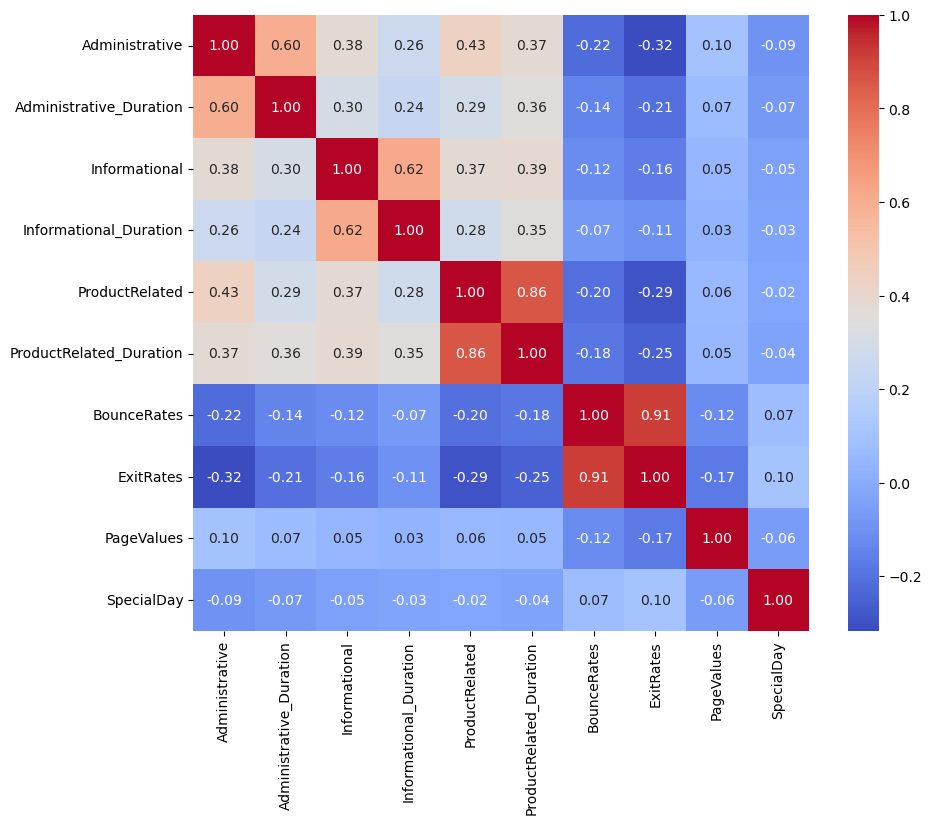

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation
correlation = data.iloc[:, 0:10].corr()

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.show()

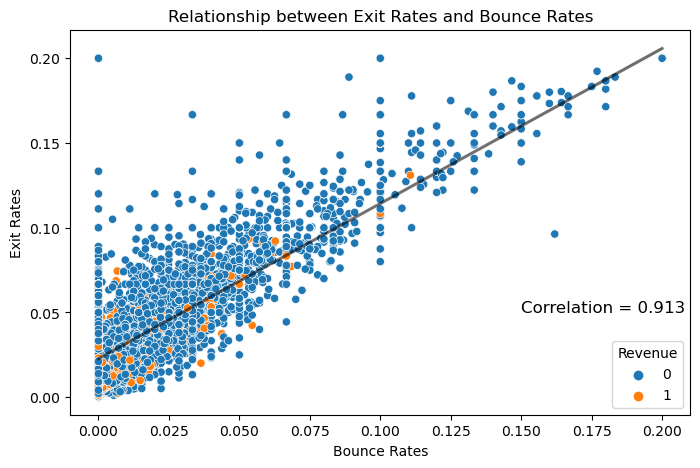

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Relationship between Exit Rates and Bounce Rates
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BounceRates', y='ExitRates', hue='Revenue', data=data)
sns.regplot(x='BounceRates', y='ExitRates', data=data, scatter=False, color='black', line_kws={'alpha':0.5})

# Calculate correlation
correlation = np.corrcoef(data['BounceRates'], data['ExitRates'])[0, 1]

plt.title('Relationship between Exit Rates and Bounce Rates')
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.text(0.15, 0.05, f'Correlation = {correlation:.3f}', fontsize=12)
plt.show()

VisitorType  New_Visitor  Other  Returning_Visitor
Revenue                                           
0                   1272     69               9081
1                    422     16               1470


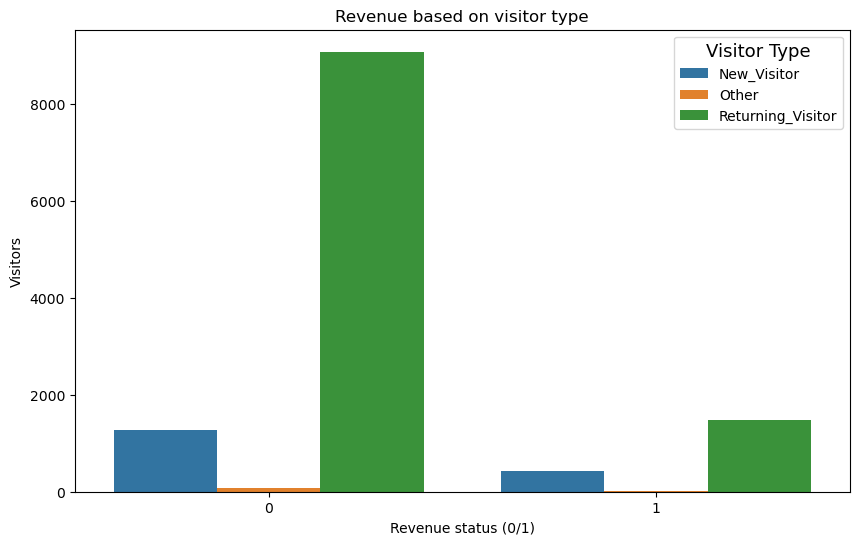

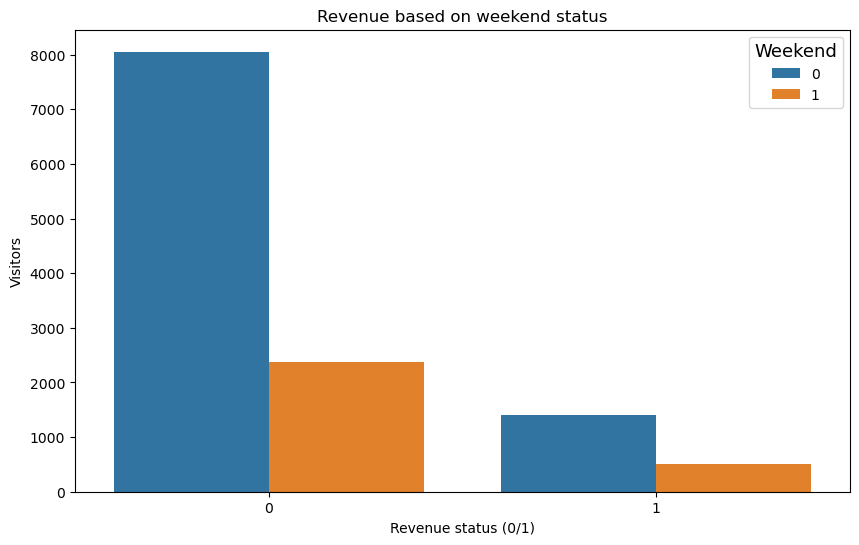

In [7]:
# Print cross-tabulation
print(pd.crosstab(data['Revenue'], data['VisitorType']))

# Revenue based on visitor type
plt.figure(figsize=(10, 6))
sns.countplot(x='Revenue', hue='VisitorType', data=data)
plt.title('Revenue based on visitor type')
plt.xlabel('Revenue status (0/1)')
plt.ylabel('Visitors')
plt.legend(title='Visitor Type', title_fontsize='13', loc='upper right')
plt.show()

# Revenue based on weekend status
plt.figure(figsize=(10, 6))
sns.countplot(x='Revenue', hue='Weekend', data=data)
plt.title('Revenue based on weekend status')
plt.xlabel('Revenue status (0/1)')
plt.ylabel('Visitors')
plt.legend(title='Weekend', title_fontsize='13', loc='upper right')
plt.show()

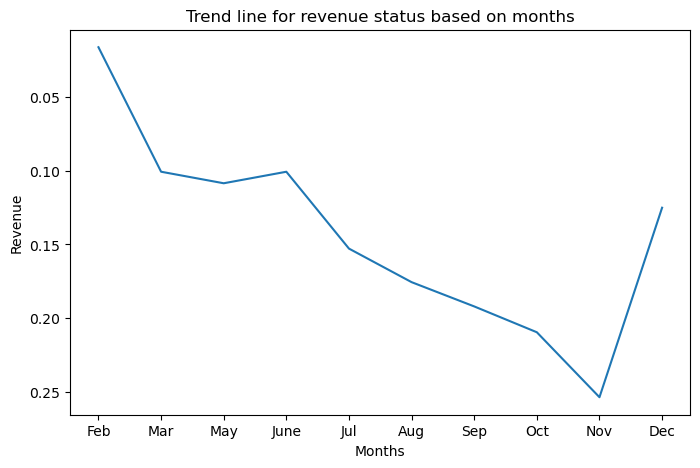

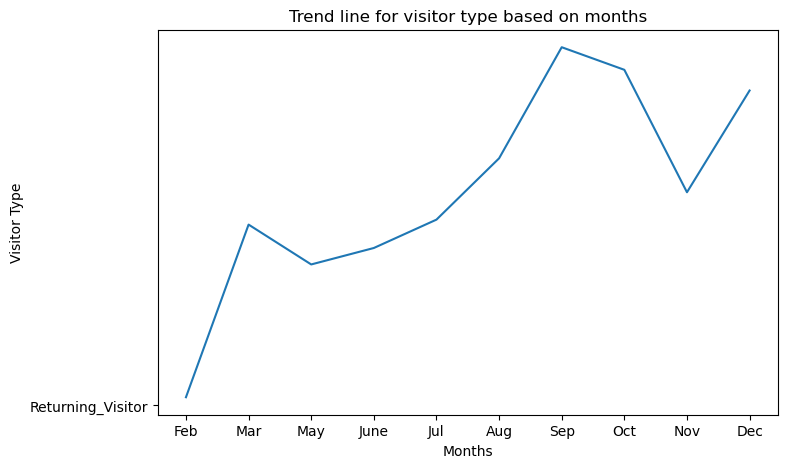

In [9]:
# Trend line for revenue status based on months
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month', y='Revenue', data=data, errorbar=None)
plt.title('Trend line for revenue status based on months')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.show()

# Trend line for visitor type based on months
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month', y='VisitorType', data=data, errorbar=None)
plt.title('Trend line for visitor type based on months')
plt.xlabel('Months')
plt.ylabel('Visitor Type')
plt.show()

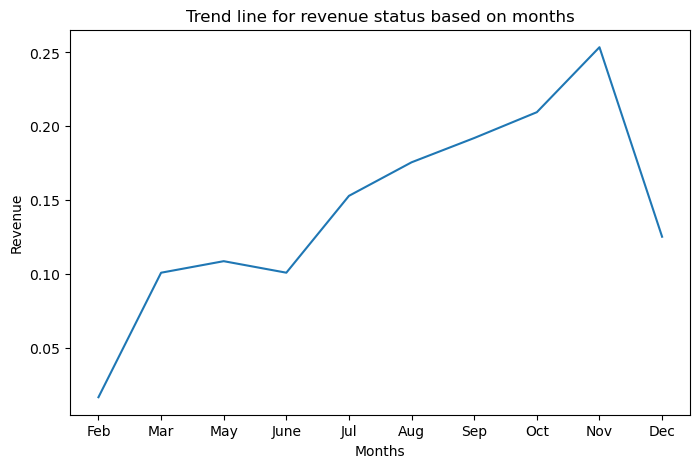

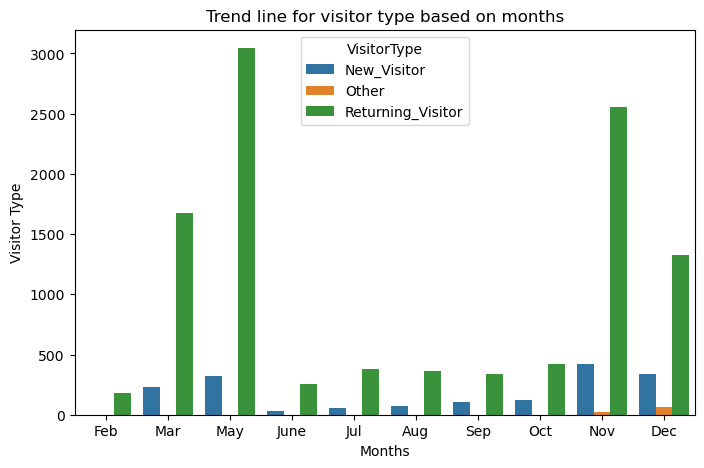

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for plotting
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)

# Trend line for revenue status based on months
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month', y='Revenue', data=data, errorbar=None)
plt.title('Trend line for revenue status based on months')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.show()

# Trend line for visitor type based on months
plt.figure(figsize=(8, 5))
sns.countplot(x='Month', hue='VisitorType', data=data)
plt.title('Trend line for visitor type based on months')
plt.xlabel('Months')
plt.ylabel('Visitor Type')
plt.show()

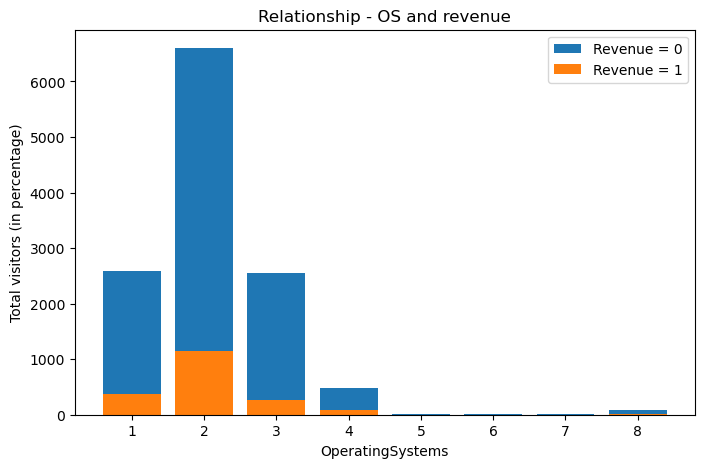

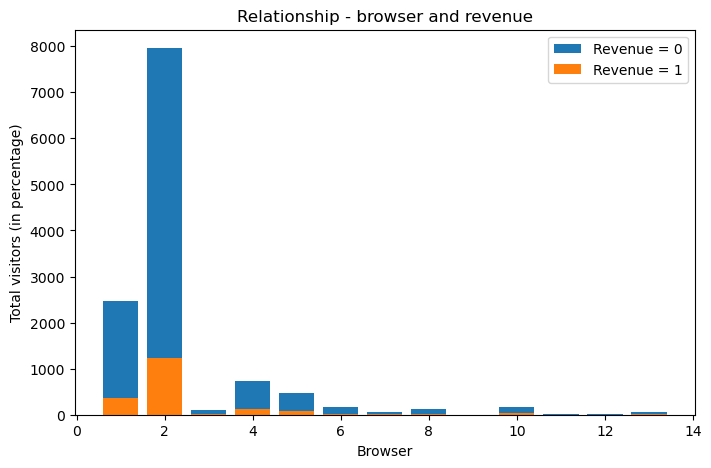

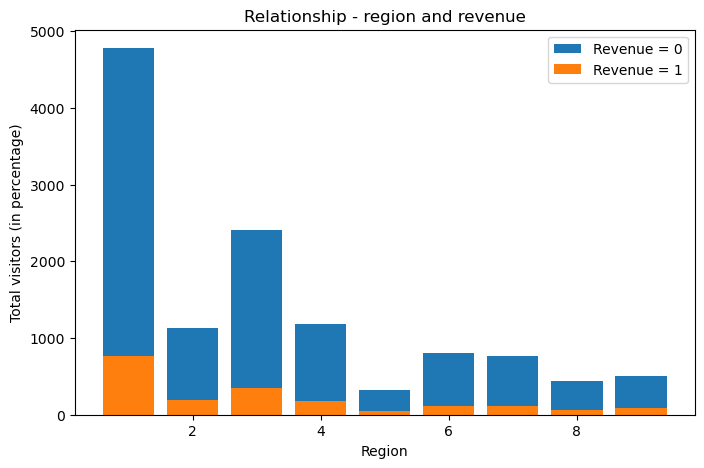

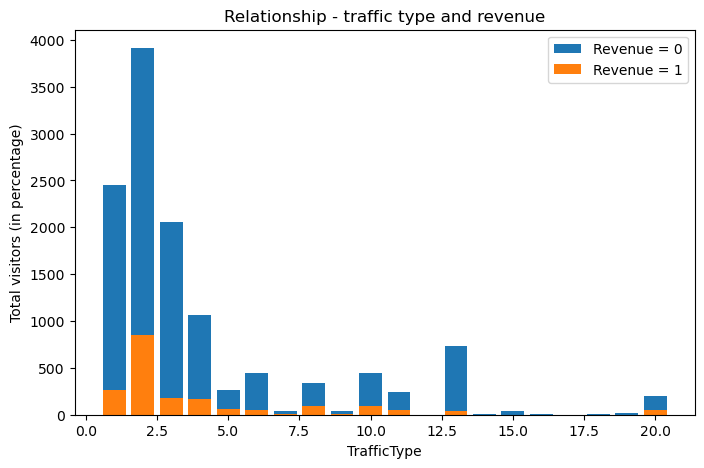

In [12]:
# Prepare data for plotting
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)

# Define a function to create the plots
def create_plot(df, column, title):
    total = df[column].value_counts().sort_index()
    revenue = df[df['Revenue'] == 1][column].value_counts().sort_index()
    no_revenue = df[df['Revenue'] == 0][column].value_counts().sort_index()

    plt.figure(figsize=(8, 5))
    plt.bar(total.index, total.values, label='Revenue = 0')
    plt.bar(revenue.index, revenue.values, label='Revenue = 1')
    plt.xlabel(column)
    plt.ylabel('Total visitors (in percentage)')
    plt.title(title)
    plt.legend()
    plt.show()

# Relationship between OS and Revenue
create_plot(data, 'OperatingSystems', 'Relationship - OS and revenue')

# Relationship between Browser and Revenue
create_plot(data, 'Browser', 'Relationship - browser and revenue')

# Relationship between Region and Revenue
create_plot(data, 'Region', 'Relationship - region and revenue')

# Relationship between TrafficType and Revenue
create_plot(data, 'TrafficType', 'Relationship - traffic type and revenue')

In [29]:
from sklearn.model_selection import train_test_split

# Set the random seed
random_seed = 777

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=random_seed, stratify=data['Revenue'])

In [28]:
data = data.dropna()

# Numerical factors better for algorithms
months = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
visitor_types = ["Returning_Visitor", "Other", "New_Visitor"]
operating_systems = [6, 3, 7, 1, 5, 2, 4, 8]
browsers = [9, 3, 6, 7, 1, 2, 8, 11, 4, 5, 10, 13, 12]
regions = [8, 6, 3, 4, 7, 1, 5, 2, 9]
traffic_types = [12, 15, 17, 18, 13, 19, 3, 9, 1, 6, 4, 14, 11, 10, 5, 2, 20, 8, 7, 16]

data['Month'] = pd.Categorical(data['Month'], categories=months, ordered=True)
data['Month_num'] = data['Month'].cat.codes + 1

data['VisitorType'] = pd.Categorical(data['VisitorType'], categories=visitor_types, ordered=True)
data['VisitorType_Num'] = data['VisitorType'].cat.codes + 1

data['OperatingSystems'] = pd.Categorical(data['OperatingSystems'], categories=operating_systems, ordered=True)
data['Browser'] = pd.Categorical(data['Browser'], categories=browsers, ordered=True)
data['Region'] = pd.Categorical(data['Region'], categories=regions, ordered=True)
data['TrafficType'] = pd.Categorical(data['TrafficType'], categories=traffic_types, ordered=True)

data['Weekend'] = np.where(data['Weekend'] == True, 1, 0)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [45]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'Revenue' is your target variable
X_train, X_test, y_train, y_test = train_test_split(data.drop('Revenue', axis=1), data['Revenue'], test_size=0.2, random_state=777, stratify=data['Revenue'])

In [47]:
# Assuming 'train' is your DataFrame
sample_train = train.copy()
scaler = StandardScaler()
sample_train.iloc[:, 0:10] = scaler.fit_transform(sample_train.iloc[:, 0:10])

In [48]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the columns of the training set and transform them
train.iloc[:, 0:10] = scaler.fit_transform(train.iloc[:, 0:10])

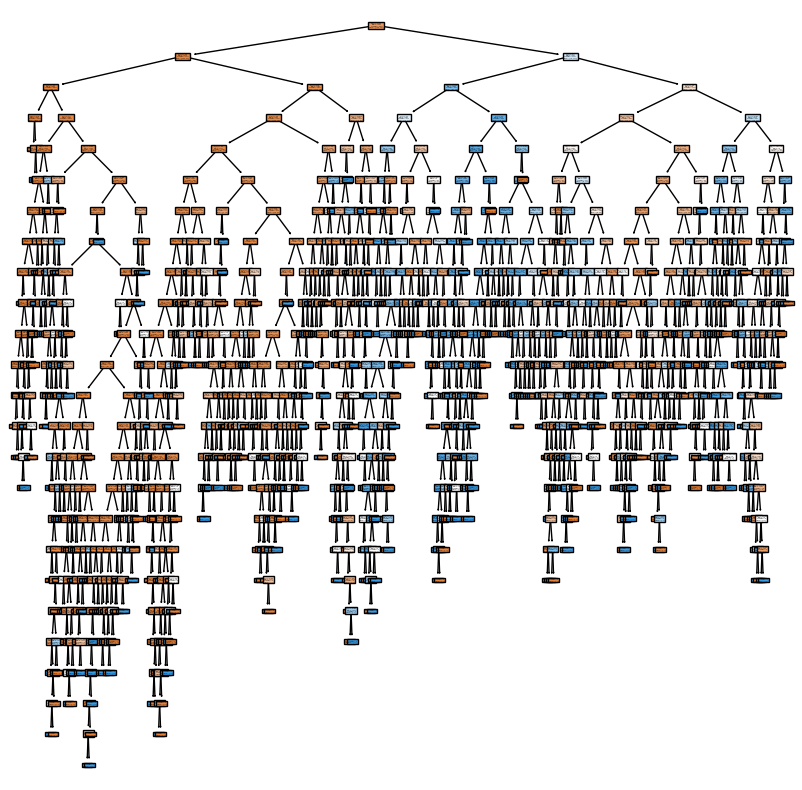

                    feature  importance
8                PageValues    0.418324
6               BounceRates    0.082542
5   ProductRelated_Duration    0.076311
7                 ExitRates    0.071844
4            ProductRelated    0.058447
..                      ...         ...
59           TrafficType_18    0.000000
58           TrafficType_17    0.000000
57           TrafficType_15    0.000000
56           TrafficType_12    0.000000
46               Browser_12    0.000000

[76 rows x 2 columns]


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
data = data.dropna()

# Convert boolean columns to int
data['Weekend'] = data['Weekend'].astype(int)

# Map categorical columns to numerical factors
month_mapping = {'Feb': 1, 'Mar': 2, 'May': 3, 'June': 4, 'Jul': 5, 'Aug': 6, 'Sep': 7, 'Oct': 8, 'Nov': 9, 'Dec': 10}
visitor_type_mapping = {"Returning_Visitor": 1, "Other": 2, "New_Visitor": 3}

data['Month_num'] = data['Month'].map(month_mapping)
data['VisitorType_Num'] = data['VisitorType'].map(visitor_type_mapping)

# Convert other categorical columns to ordered categories
for col in ['OperatingSystems', 'Browser', 'Region', 'TrafficType']:
    data[col] = pd.Categorical(data[col], ordered=True)

# One-hot encode the categorical columns
data_encoded = pd.get_dummies(data, columns=['Month', 'VisitorType', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'])

# Set the random seed
random_seed = 777

# Split the data into training and testing sets
train_encoded, test_encoded = train_test_split(data_encoded, test_size=0.2, random_state=random_seed, stratify=data_encoded['Revenue'])

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier(random_state=1)

# Fit the classifier to the training data
clf.fit(train_encoded.drop('Revenue', axis=1), train_encoded['Revenue'])

# Plot the decision tree
plt.figure(figsize=(10, 10))
plot_tree(clf, filled=True)
plt.show()

# Print the feature importances
importances = pd.DataFrame({'feature':train_encoded.columns.drop('Revenue'), 'importance':clf.feature_importances_})
print(importances.sort_values('importance', ascending=False))

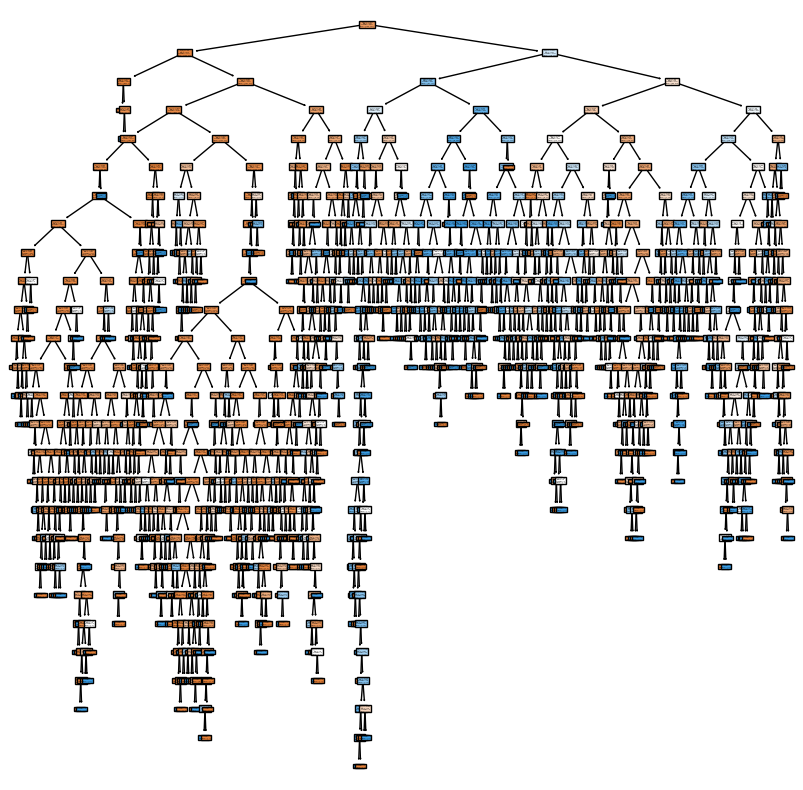

                         importance
feature                            
PageValues                    0.423
ProductRelated_Duration       0.098
BounceRates                   0.087
ExitRates                     0.063
ProductRelated                0.060
Administrative_Duration       0.056
Month_num                     0.041
Region                        0.030
Administrative                0.030
Informational_Duration        0.026
TrafficType                   0.022
Informational                 0.018
Browser                       0.016
OperatingSystems              0.013
Weekend                       0.008
VisitorType_Num               0.007
SpecialDay                    0.001


In [49]:
# Drop the 'Month' and 'VisitorType' columns if they exist
if 'Month' in sample_train.columns:
    sample_train = sample_train.drop('Month', axis=1)
if 'VisitorType' in sample_train.columns:
    sample_train = sample_train.drop('VisitorType', axis=1)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4_decision = DecisionTreeClassifier(random_state=1)
model4_decision.fit(sample_train.drop('Revenue', axis=1), sample_train['Revenue'])

# Plot
plt.figure(figsize=(10,10))
tree.plot_tree(model4_decision, filled=True)
plt.show()

# Variable Importance
importances = pd.DataFrame({'feature':sample_train.drop('Revenue', axis=1).columns,'importance':np.round(model4_decision.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def metrics(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Metrics
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    tpr_recall = recall_score(y_true, y_pred)
    fpr = fp / (fp + tn)
    tnr_specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)

    print(f"Accuracy = {accuracy}")
    print(f"Error Rate = {error_rate}")
    print(f"True Positive Rate (Recall) = {tpr_recall}")
    print(f"False Positive Rate = {fpr}")
    print(f"True Negative Rate (Specificity) = {tnr_specificity}")
    print(f"Precision = {precision}")
    print(f"F1Score = {f1score}")

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test['Revenue'], y_pred))

# Accuracy
print("\nAccuracy:")
print(accuracy_score(test['Revenue'], y_pred))

# Error Rate
print("\nError Rate:")
print(1 - accuracy_score(test['Revenue'], y_pred))

# True Positive Rate (Recall)
print("\nTrue Positive Rate (Recall):")
print(recall_score(test['Revenue'], y_pred))

# False Positive Rate
tn, fp, fn, tp = confusion_matrix(test['Revenue'], y_pred).ravel()
print("\nFalse Positive Rate:")
print(fp / (fp + tn))

# True Negative Rate (Specificity)
print("\nTrue Negative Rate (Specificity):")
print(tn / (tn + fp))

# Precision
print("\nPrecision:")
print(precision_score(test['Revenue'], y_pred))

# F1 Score
print("\nF1 Score:")
print(f1_score(test['Revenue'], y_pred))

Confusion Matrix:
[[ 652 1432]
 [ 116  266]]

Accuracy:
0.3722627737226277

Error Rate:
0.6277372262773723

True Positive Rate (Recall):
0.6963350785340314

False Positive Rate:
0.6871401151631478

True Negative Rate (Specificity):
0.31285988483685223

Precision:
0.15665488810365136

F1 Score:
0.25576923076923075


In [41]:
import dash
from dash import dcc
from dash import html
import plotly.graph_objects as go
import pandas as pd

# Assuming 'data' is your DataFrame
correlation = data.iloc[:, 0:10].corr()

# Create a heatmap with Plotly
heatmap = go.Heatmap(
    z=correlation.values,
    x=list(correlation.columns),
    y=list(correlation.index),
    colorscale='coolwarm'
)

data=[heatmap]

# Create a Dash application
app = dash.Dash(__name__)

# Create a layout for the application
app.layout = html.Div([
    dcc.Graph(
        id='heatmap',
        figure={
            'data': data,
            'layout': go.Layout(
                autosize=True,
                height=500
            )
        }
    )
])

# Run the application
if __name__ == '__main__':
    app.run_server(debug=True)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'colorscale' property of heatmap
        Received value: 'coolwarm'

    The 'colorscale' property is a colorscale and may be
    specified as:
      - A list of colors that will be spaced evenly to create the colorscale.
        Many predefined colorscale lists are included in the sequential, diverging,
        and cyclical modules in the plotly.colors package.
      - A list of 2-element lists where the first element is the
        normalized color level value (starting at 0 and ending at 1),
        and the second item is a valid color string.
        (e.g. [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']])
      - One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'].
        Appending '_r' to a named colorscale reverses it.


In [42]:
# Assuming 'data' is your DataFrame
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)

def create_plot(df, column, title):
    total = df[column].value_counts().sort_index()
    revenue = df[df['Revenue'] == 1][column].value_counts().sort_index()
    no_revenue = df[df['Revenue'] == 0][column].value_counts().sort_index()

    fig = go.Figure(data=[
        go.Bar(name='Revenue = 0', x=total.index, y=total.values),
        go.Bar(name='Revenue = 1', x=revenue.index, y=revenue.values)
    ])
    fig.update_layout(barmode='group', title_text=title)
    return fig

# Create a Dash application
app = dash.Dash(__name__)

# Create a layout for the application
app.layout = html.Div([
    dcc.Graph(
        id='os-revenue',
        figure=create_plot(data, 'OperatingSystems', 'Relationship - OS and revenue')
    ),
    dcc.Graph(
        id='browser-revenue',
        figure=create_plot(data, 'Browser', 'Relationship - browser and revenue')
    ),
    dcc.Graph(
        id='region-revenue',
        figure=create_plot(data, 'Region', 'Relationship - region and revenue')
    ),
    dcc.Graph(
        id='traffic-revenue',
        figure=create_plot(data, 'TrafficType', 'Relationship - traffic type and revenue')
    )
])

# Run the application
if __name__ == '__main__':
    app.run_server(debug=True)